<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Build Fast with AI](https://img.shields.io/badge/BuildFastWithAI-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://www.buildfastwithai.com/genai-course)
[![EduChain GitHub](https://img.shields.io/github/stars/satvik314/educhain?style=for-the-badge&logo=github&color=gold)](https://github.com/satvik314/educhain)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](hhttps://colab.research.google.com/drive/1nEpJaJIh9u6rtby-316-hsPFDZwERDoM?usp=sharing)
## Master Generative AI in 6 Weeks
**What You'll Learn:**
- Build with Latest LLMs
- Create Custom AI Apps
- Learn from Industry Experts
- Join Innovation Community
Transform your AI ideas into reality through hands-on projects and expert mentorship.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)
*Empowering the Next Generation of AI Innovators

# 🚀 Atomic_Agents_Modular_AI_Framework  

**Atomic Agents** is designed to provide **modular, predictable, extensible, and controllable** AI systems for real-world applications. Unlike traditional multi-agent frameworks, which often lack control, **Atomic Agents ensures consistent and reliable outputs** tailored to business needs.  

## 🔑 Why Choose Atomic Agents?  

✅ **Modularity** – Build AI applications using **small, reusable** components.  
🎯 **Predictability** – Ensure **consistent** behavior with **clear input/output schemas**.  
🔄 **Extensibility** – Easily swap or integrate new components **without disruptions**.  
🎛 **Control** – Fine-tune **each part** of the system, from prompts to integrations.  

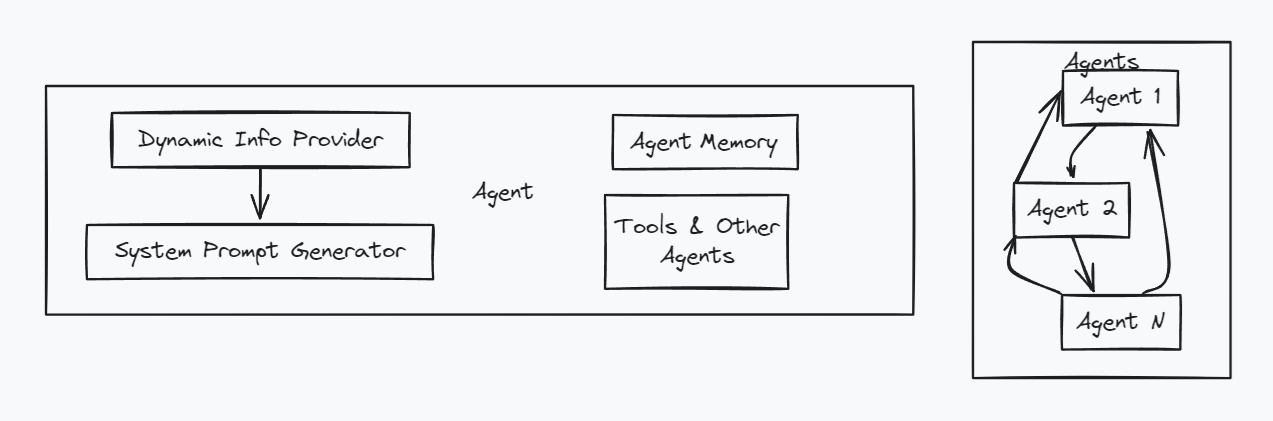

## 🧩 Anatomy of an Agent  

An **Atomic Agent** consists of **several key components**:  

📝 **System Prompt** – Defines **how the agent behaves** and its **purpose**.  
📥 **Input Schema** – Specifies **what the agent expects** as input.  
📤 **Output Schema** – Ensures **structured and validated** output.  
🧠 **Memory** – Stores **conversation history** and relevant data.  
🌍 **Context Providers** – Inject **dynamic context** into the agent at runtime.  


### **🚀 Installation & Setup**  








In [ ]:
pip install atomic-agents

In [ ]:
import os
import instructor
import openai
from rich.console import Console
from rich.panel import Panel
from rich.text import Text
from atomic_agents.lib.components.agent_memory import AgentMemory
from atomic_agents.agents.base_agent import BaseAgent, BaseAgentConfig, BaseAgentInputSchema, BaseAgentOutputSchema
from google.colab import userdata


API_KEY = userdata.get("OPENAI_API_KEY")

### **🧠 AI Agent Initialization**  








In [ ]:
console = Console()

memory = AgentMemory()

initial_message = BaseAgentOutputSchema(chat_message="Hello! How can I assist you today?")
memory.add_message("assistant", initial_message)

client = instructor.from_openai(openai.OpenAI(api_key=API_KEY))

agent = BaseAgent(
    config=BaseAgentConfig(
        client=client,
        model="gpt-4o-mini",
        memory=memory,
    )
)

### **💬 Interactive Chat Loop**  








In [ ]:
default_system_prompt = agent.system_prompt_generator.generate_prompt()

console.print(Panel(default_system_prompt, width=console.width, style="bold cyan"), style="bold cyan")

console.print(Text("Agent:", style="bold green"), end=" ")
console.print(Text(initial_message.chat_message, style="bold green"))

while True:
    user_input = console.input("[bold blue]You:[/bold blue] ")
    if user_input.lower() in ["/exit", "/quit"]:
        console.print("Exiting chat...")
        break

    input_schema = BaseAgentInputSchema(chat_message=user_input)
    response = agent.run(input_schema)

    agent_message = Text(response.chat_message, style="bold green")
    console.print(Text("Agent:", style="bold green"), end=" ")
    console.print(agent_message)

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ # IDENTITY and PURPOSE                                                                                          │
│ - This is a conversation with a helpful and friendly AI assistant.                                              │
│                                                                                                                 │
│ # OUTPUT INSTRUCTIONS                                                                                           │
│ - Always respond using the proper JSON schema.                                                                  │
│ - Always use the available additional information and context to enhance the response.                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Agent:

Hello! How can I assist you today?

You:

What is python?


Agent:

Python is a high-level, interpreted programming language known for its readability and simplicity. It was created 
by Guido van Rossum and first released in 1991. Python supports multiple programming paradigms, including 
procedural, object-oriented, and functional programming. It is widely used for web development, data analysis, 
artificial intelligence, scientific computing, and automation, among other applications. Python's extensive 
standard library and active community contribute to its popularity, making it a great choice for both beginners and
experienced developers.

You:

exit


Agent:

Thank you for chatting! If you have any more questions in the future, feel free to ask. Have a great day!

You:

### **🖼️ Multimodal Nutrition Label Analysis**  


In [ ]:
from atomic_agents.agents.base_agent import BaseAgent, BaseAgentConfig
from atomic_agents.lib.base.base_io_schema import BaseIOSchema
from atomic_agents.lib.components.system_prompt_generator import SystemPromptGenerator
import instructor
import openai
from pydantic import Field
from typing import List
import os

### **📊 Nutrition Label Data Schema**  








In [ ]:

class NutritionLabel(BaseIOSchema):
    """Represents the complete nutritional information from a food label"""

    calories: int = Field(..., description="Calories per serving")
    total_fat: float = Field(..., description="Total fat in grams")
    saturated_fat: float = Field(..., description="Saturated fat in grams")
    trans_fat: float = Field(..., description="Trans fat in grams")
    cholesterol: int = Field(..., description="Cholesterol in milligrams")
    sodium: int = Field(..., description="Sodium in milligrams")
    total_carbohydrates: float = Field(..., description="Total carbohydrates in grams")
    dietary_fiber: float = Field(..., description="Dietary fiber in grams")
    total_sugars: float = Field(..., description="Total sugars in grams")
    added_sugars: float = Field(..., description="Added sugars in grams")
    protein: float = Field(..., description="Protein in grams")
    vitamin_d: float = Field(..., description="Vitamin D in micrograms")
    calcium: int = Field(..., description="Calcium in milligrams")
    iron: float = Field(..., description="Iron in milligrams")
    potassium: int = Field(..., description="Potassium in milligrams")
    serving_size: str = Field(..., description="The size of a single serving of this product")
    servings_per_container: float = Field(..., description="Number of servings contained in the package")
    product_name: str = Field(
        ...,
        description="The full name or description of the type of the food/drink. e.g: 'Coca Cola Light', 'Pepsi Max', 'Smoked Bacon', 'Chianti Wine'",
    )


### **📥 Nutrition Analysis Input Schema**  








In [ ]:
class NutritionAnalysisInput(BaseIOSchema):
    """Input schema for nutrition label analysis"""

    instruction_text: str = Field(..., description="The instruction for analyzing the nutrition label")
    images: List[instructor.Image] = Field(..., description="The nutrition label images to analyze")

### **📤 Nutrition Analysis Output Schema**  








In [ ]:
class NutritionAnalysisOutput(BaseIOSchema):
    """Output schema containing extracted nutrition information"""

    analyzed_labels: List[NutritionLabel] = Field(
        ..., description="List of nutrition labels extracted from the provided images"
    )

### **🤖 Nutrition Analyzer Agent Configuration**  


In [ ]:
nutrition_analyzer = BaseAgent(
    config=BaseAgentConfig(
        client=instructor.from_openai(openai.OpenAI(api_key=API_KEY)),
        model="gpt-4o-mini",
        system_prompt_generator=SystemPromptGenerator(
            background=[
                "You are a specialized nutrition label analyzer.",
                "You excel at extracting precise nutritional information from food label images.",
                "You understand various serving size formats and measurement units.",
                "You can process multiple nutrition labels simultaneously.",
            ],
            steps=[
                "For each nutrition label image:",
                "1. Locate and identify the nutrition facts panel",
                "2. Extract all serving information and nutritional values",
                "3. Validate measurements and units for accuracy",
                "4. Compile the nutrition facts into structured data",
            ],
            output_instructions=[
                "For each analyzed nutrition label:",
                "1. Record complete serving size information",
                "2. Extract all nutrient values with correct units",
                "3. Ensure all measurements are properly converted",
                "4. Include all extracted labels in the final result",
            ],
        ),
        input_schema=NutritionAnalysisInput,
        output_schema=NutritionAnalysisOutput,
    )
)

### **📥 Image Download & Nutrition Analysis**








In [ ]:
import os
import requests

def download_image(url, save_path):
    response = requests.get(url)
    with open(save_path, "wb") as file:
        file.write(response.content)

def main():
    print("🚀 Starting nutrition label analysis...")

    test_images_directory = "/content/test_images"
    os.makedirs(test_images_directory, exist_ok=True)

    image_url_1 = "https://github.com/BrainBlend-AI/atomic-agents/raw/main/atomic-examples/basic-multimodal/test_images/nutrition_label_1.png"
    image_url_2 = "https://github.com/BrainBlend-AI/atomic-agents/raw/main/atomic-examples/basic-multimodal/test_images/nutrition_label_2.jpg"

    image_path_1 = os.path.join(test_images_directory, "nutrition_label_1.png")
    image_path_2 = os.path.join(test_images_directory, "nutrition_label_2.jpg")

    download_image(image_url_1, image_path_1)
    download_image(image_url_2, image_path_2)
    print(f"✅ Images downloaded successfully to: {test_images_directory}")

    analysis_request = NutritionAnalysisInput(
        instruction_text="Please analyze these nutrition labels and extract all nutritional information.",
        images=[instructor.Image.from_path(image_path_1), instructor.Image.from_path(image_path_2)],
    )

    try:
        print("🔍 Analyzing nutrition labels...")
        analysis_result = nutrition_analyzer.run(analysis_request)
        print("✅ Analysis completed successfully!")

        # Display results
        for i, label in enumerate(analysis_result.analyzed_labels, 1):
            print(f"\n📌 **Nutrition Label {i}**")
            print(f"📦 Product Name: {label.product_name}")
            print(f"🍽 Serving Size: {label.serving_size}")
            print(f"🥄 Servings Per Container: {label.servings_per_container}")
            print(f"🔥 Calories: {label.calories}")
            print(f"🥑 Total Fat: {label.total_fat}g")
            print(f"🧈 Saturated Fat: {label.saturated_fat}g")
            print(f"❌ Trans Fat: {label.trans_fat}g")
            print(f"❤️ Cholesterol: {label.cholesterol}mg")
            print(f"🧂 Sodium: {label.sodium}mg")
            print(f"🍞 Total Carbs: {label.total_carbohydrates}g")
            print(f"🌾 Dietary Fiber: {label.dietary_fiber}g")
            print(f"🍬 Total Sugars: {label.total_sugars}g")
            print(f"➕ Added Sugars: {label.added_sugars}g")
            print(f"💪 Protein: {label.protein}g")
            print(f"🌞 Vitamin D: {label.vitamin_d}mcg")
            print(f"🥛 Calcium: {label.calcium}mg")
            print(f"🩸 Iron: {label.iron}mg")
            print(f" Potassium: {label.potassium}mg")

    except Exception as e:
        print(f"❌ Analysis failed: {str(e)}")
        raise

if __name__ == "__main__":
    main()


🚀 Starting nutrition label analysis...
✅ Images downloaded successfully to: /content/test_images
🔍 Analyzing nutrition labels...
✅ Analysis completed successfully!

📌 **Nutrition Label 1**
📦 Product Name: Pretzels
🍽 Serving Size: 3 pretzels (28g)
🥄 Servings Per Container: 3.0
🔥 Calories: 110
🥑 Total Fat: 0.5g
🧈 Saturated Fat: 0.0g
❌ Trans Fat: 0.0g
❤️ Cholesterol: 0mg
🧂 Sodium: 400mg
🍞 Total Carbs: 23.0g
🌾 Dietary Fiber: 2.0g
🍬 Total Sugars: 1.0g
➕ Added Sugars: 0.0g
💪 Protein: 2.0g
🌞 Vitamin D: 0.0mcg
🥛 Calcium: 10mg
🩸 Iron: 1.2mg
 Potassium: 90mg

📌 **Nutrition Label 2**
📦 Product Name: Drink (200 ml)
🍽 Serving Size: 100 ml
🥄 Servings Per Container: 5.0
🔥 Calories: 33
🥑 Total Fat: 0.5g
🧈 Saturated Fat: 0.0g
❌ Trans Fat: 0.0g
❤️ Cholesterol: 0mg
🧂 Sodium: 0mg
🍞 Total Carbs: 4.7g
🌾 Dietary Fiber: 0.0g
🍬 Total Sugars: 4.7g
➕ Added Sugars: 0.0g
💪 Protein: 3.4g
🌞 Vitamin D: 0.0mcg
🥛 Calcium: 120mg
🩸 Iron: 0.0mg
 Potassium: 0mg
